### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [45]:
lista_edad_altura = [[29,  1.66], [22, 1.83], [31, 1.80], [27, 1.75], [22,1.82], [35,1.79], [34,1.90], [26,1.78], [26, 1.64], [23, 1.74],[24,1.85], [28, 1.75], [23, 1.83],[32,1.74], [34, 1.57], [27, 1.58],[38,1.70],[22, 1.79]]
dt = pd.DataFrame(lista_edad_altura)
dt

,0,1
0,29,1.66
1,22,1.83
2,31,1.80
3,27,1.75
4,22,1.82
5,35,1.79
6,34,1.90
7,26,1.78
8,26,1.64
9,23,1.74


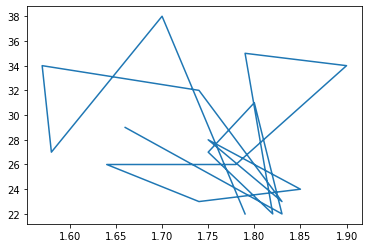

In [4]:
#Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase:
plt.plot(dt[1],dt[0])

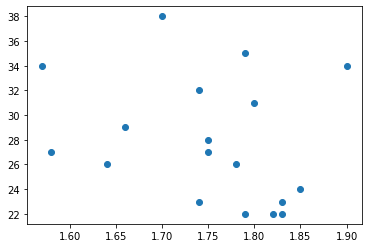

In [5]:
#Dibujar con puntos para que pueda enterse mejor, aún asi no se aprecia ninguna relación 
plt.scatter(dt[1],dt[0])

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


In [80]:
X= dt[[0]]
Y= dt[1]

In [47]:
X= np.array(dt[0]).reshape(-1,1)
X.shape

(18, 1)

In [81]:
Y.shape

(18,)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [80]:
X_train.shape

(14, 1)

In [81]:
X_test.shape

(4, 1)

In [82]:
y_train.shape

(14,)

In [83]:
y_test.shape

(4,)

In [49]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

In [50]:
lm.fit(X_train, y_train)

LinearRegression()

y_train_predict [1.7]
-----
X_test
 [[34]
 [23]
 [29]
 [27]]
y_val_predict [1.7 1.7 1.7 1.7]
y_train_predict [1.7  1.82]
-----
X_test
 [[34]
 [23]
 [29]
 [27]]
y_val_predict [1.73   1.8125 1.7675 1.7825]
y_train_predict [1.69353234 1.80577114 1.77069652]
-----
X_test
 [[34]
 [23]
 [29]
 [27]]
y_val_predict [1.72159204 1.79875622 1.75666667 1.77069652]
y_train_predict [1.69608696 1.78204969 1.75518634 1.77667702]
-----
X_test
 [[34]
 [23]
 [29]
 [27]]
y_val_predict [1.71757764 1.77667702 1.74444099 1.75518634]
y_train_predict [1.69737705 1.80398126 1.77066745 1.7973185  1.79065574]
-----
X_test
 [[34]
 [23]
 [29]
 [27]]
y_val_predict [1.7240281  1.7973185  1.75734192 1.77066745]
y_train_predict [1.77604361 1.80370717 1.79506231 1.80197819 1.80024922 1.7829595 ]
-----
X_test
 [[34]
 [23]
 [29]
 [27]]
y_val_predict [1.7829595  1.80197819 1.79160436 1.79506231]
y_train_predict [1.7772112  1.80026838 1.79306301 1.7988273  1.79738623 1.7829755
 1.80026838]
-----
X_test
 [[34]
 [23]
 [29]
 [2

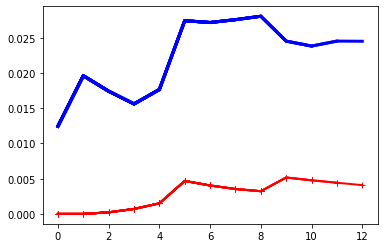

In [51]:
train_errors, val_errors = [], []
for m in range(1, len(X_train)):  # Incremental
    x = X_train[:m]
    y = y_train[:m]
    lm.fit(x, y) #coge el modelo y el fit es entrena el modelo con nuestra x y nuestra y 

    y_train_predict = lm.predict(x) #predice x 
    y_val_predict = lm.predict(X_test)

    train_errors.append(mean_squared_error(y, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))
    print("y_train_predict", y_train_predict)
    print("-----\nX_test\n", X_test)
    print("y_val_predict", y_val_predict)

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")

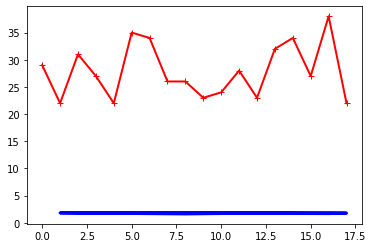

In [52]:
plt.plot(X, "r-+", linewidth=2)
plt.plot(y, "b-", linewidth=3)

In [53]:
train_errors

[0.0,
 0.0,
 0.00022421227197346678,
 0.0007069099378882028,
 0.0014995550351288127,
 0.004682268951194194,
 0.004033480580096685,
 0.003535717273107486,
 0.003222114455592712,
 0.005167357078718948,
 0.004772964426877477,
 0.004425384615384613,
 0.004085137241613015]

In [54]:
val_errors

[0.012449999999999992,
 0.019617187499999994,
 0.017416481646493873,
 0.015610758410169345,
 0.017655565454480576,
 0.027427118513504253,
 0.02716830061549544,
 0.027573004659358802,
 0.02805786448977088,
 0.024523747263216183,
 0.02382479064272213,
 0.02452981065088764,
 0.024506944400240697]

<AxesSubplot:>

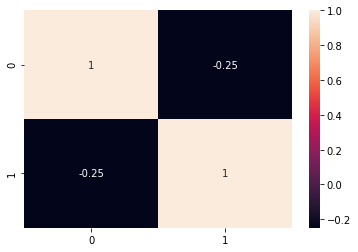

In [94]:
#Matriz de correlación 
sns.heatmap(dt.corr(), annot= True)

In [55]:
print(lm.intercept_) 

1.8052334801762118


In [56]:
lm.coef_

array([-0.0009163])

In [57]:
X_test

array([[34],
       [23],
       [29],
       [27]], dtype=int64)

In [58]:
predictions = lm.predict(X_test)
predictions

array([1.7740793 , 1.78415859, 1.77866079, 1.78049339])

In [26]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.14226872246696048
MSE: 0.024506944400240697
RMSE: 0.15654693992614707


In [60]:
lm.score(X,Y)

-0.08119327950027322

In [61]:
lm.score(X_test,y_test)

-1.2587045530175756

In [62]:
#Multiplicar la edad por dos
X= X*2
X

array([[58],
       [44],
       [62],
       [54],
       [44],
       [70],
       [68],
       [52],
       [52],
       [46],
       [48],
       [56],
       [46],
       [64],
       [68],
       [54],
       [76],
       [44]], dtype=int64)

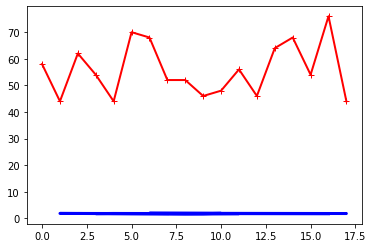

In [63]:
plt.plot(X, "r-+", linewidth=2)
plt.plot(y, "b-", linewidth=3)

train_errors [0.0, 4.190823558986625e-31, 0.00825714285714286, 0.0074410112359550515, 0.006036828193832593, 0.00892170022371364, 0.012108401084010827, 0.011037300531914884, 0.009826763617808385, 0.009372642380708049, 0.008892270439292246, 0.008585242851547195, 0.007942870853252206]
-----
val_errors
 [0.04197499999999999, 0.11497499999999998, 0.021769897959183663, 0.010567444135841455, 0.010295717460071034, 0.011323286113238145, 0.010386467307084998, 0.007096089152331387, 0.006966238411844346, 0.007587630360493259, 0.007958966929628754, 0.006608604275608578, 0.006757657411508173]


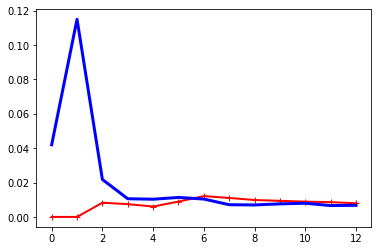

In [65]:
train_errors, val_errors = [], []
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)    
for m in range(1, len(X_train)): 
    x = X_train[:m]
    y = y_train[:m]
    lm.fit(x, y) 

    y_train_predict = lm.predict(x)
    y_val_predict = lm.predict(X_test)

    train_errors.append(mean_squared_error(y, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))
print("train_errors", train_errors)
print("-----\nval_errors\n", val_errors)
plt.plot(train_errors, "r-+", linewidth=2, label="train")
plt.plot(val_errors, "b-", linewidth=3, label="val")


In [66]:
predictions = lm.predict(X_test)
predictions

array([1.75153249, 1.74501412, 1.75370527, 1.74718691])

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.07173375706214707
MSE: 0.006757657411508173
RMSE: 0.08220497193909973


In [68]:
lm.score(X_train, y_train) * 100

3.178418912826564

In [69]:
lm.score(X_test, y_test) * 100 

0.8959499687162475

In [72]:
lm.score(X, Y) * 100


3.6855206338816116

In [82]:
#¿Qué ocurre si la altura se multiplica por dos?
Y = Y*2
Y

0     3.32
1     3.66
2     3.60
3     3.50
4     3.64
5     3.58
6     3.80
7     3.56
8     3.28
9     3.48
10    3.70
11    3.50
12    3.66
13    3.48
14    3.14
15    3.16
16    3.40
17    3.58
Name: 1, dtype: float64

In [83]:
Y.shape

(18,)

In [78]:
X= np.array(dt[0]).reshape(-1,1)
X.shape

(18, 1)

train_errors [0.0, 1.9721522630525295e-31, 0.0008666666666666623, 0.0006685714285714292, 0.009275270935960606, 0.02152896174863388, 0.020393564115065824, 0.017889591078066914, 0.0168218009478673, 0.025515540605478136, 0.03365816124053795, 0.035652373988495654, 0.036853550295857976]
-----
val_errors
 [0.018200000000000032, 0.016512499999999965, 0.014249999999999974, 0.013295328798185926, 0.02705061030357433, 0.04552159365761884, 0.05011025172104484, 0.050197523527867216, 0.04506340406774359, 0.045544836662040164, 0.045034570005012695, 0.025715612057629903, 0.016749648668639008]


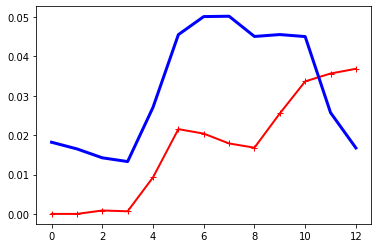

In [84]:
train_errors, val_errors = [], []
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)    
for m in range(1, len(X_train)): 
    x = X_train[:m]
    y = y_train[:m]
    lm.fit(x, y) 

    y_train_predict = lm.predict(x)
    y_val_predict = lm.predict(X_test)

    train_errors.append(mean_squared_error(y, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))
print("train_errors", train_errors)
print("-----\nval_errors\n", val_errors)
plt.plot(train_errors, "r-+", linewidth=2, label="train")
plt.plot(val_errors, "b-", linewidth=3, label="val")

In [85]:
predictions = lm.predict(X_test)
predictions

array([3.49730769, 3.45576923, 3.47134615, 3.5025    ])

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.11826923076923057
MSE: 0.016749648668639008
RMSE: 0.12942043373686787


In [91]:
lm.score(X,Y)* 100

2.0943216683798282

In [92]:
lm.score(X_train, y_train)* 100

2.8907336157894203

In [93]:
lm.score(X_test, y_test)* 100

-340.78022812207837

In [101]:
r2 = r2_score(y_test,predictions)
r2

-3.4078022812207838